In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from itertools import product

In [9]:

def func(x,y):
    return x**2 +y**2 + 2*x + 2*y

def fprime_x(x):
    return 2*x + 2
def fprime_y(y):
    return 2*y + 2

In [308]:
def plotFunc(x0, y0):
    h = np.linspace(-5, 5, 100)
    v = np.linspace(-5, 5, 100)
    nu = np.zeros( (h.size, v.size) )

    counter_y = 0

    for deta in v:
        counter_x = 0
        for beta in v:
            nu[counter_x, counter_y] = math.pow(beta,2) + 2 * beta + math.pow(deta,2) +2 * deta
            counter_x += 1
        counter_y += 1

    X, Y = np.meshgrid(h, v)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(X, Y, nu)
    ax.scatter(x0,y0,func(x0,y0), color='red')
    #ax.scatter(10, 10, 10, color='red', linestyle='--')
    
    
def plotPath(xs, ys,zs, x0,y0):
    h = np.linspace(-5, 5, 100)
    v = np.linspace(-5, 5, 100)
    nu = np.zeros( (h.size, v.size) )

    counter_y = 0

    for deta in v:
        counter_x = 0
        for beta in v:
            nu[counter_x, counter_y] = math.pow(beta,2) + 2 * beta + math.pow(deta,2) +2 * deta
            counter_x += 1
        counter_y += 1

    X, Y = np.meshgrid(h, v)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(X, Y, nu, color='gray',alpha=.3 )
    ax.scatter(x0,y0,func(x0,y0), color='red')
    ax.scatter(xs, ys, zs, color='red', linestyle='--')


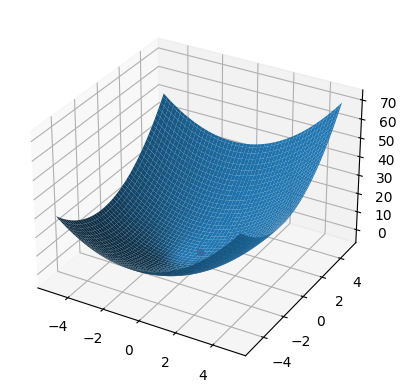

In [314]:
x0 = -5
y0 = -5
plotFunc(0, 0)

In [325]:
def GradientDescentSimple(func, fprime, x0, y0, alpha, tol=1, max_iter=10):
    # initialize x, f(x), and -f'(x)
    xk = x0
    yk = y0
    zk = func(x0, y0)
    
    pk_x = -fprime_x(xk)
    pk_y = -fprime_y(yk)
    
    # initialize number of steps, save x and f(x)
    num_iter = 0
    curve_x = [xk]
    curve_y = [yk]
    curve_z = [zk]
    # take steps
    # abs(pk_x) > tol
    while num_iter < max_iter:
        # calculate new x, f(x), and -f'(x)
        xk = xk + alpha * pk_x
        
        pk_x = -fprime(xk)
        
        yk = yk + alpha * pk_y
        
        pk_y = -fprime(yk)
        
        # increase number of steps by 1, save new x and f(x)
        num_iter += 1
        curve_x.append(xk)
        curve_y.append(yk)
        zk = func(xk, yk)
        # print('xs',xk)
        # print('ys',yk)
        # print('zs',zk)
        # print('####')
        curve_z.append(zk)
    # print results
    print("num_iter", num_iter)
    if num_iter == max_iter:
        print('Gradient descent does not converge.')
    else:
        print("Solution found")
        #print('Solution found:\n  y = {:.4f}\n  x = {:.4f}'.format(fk_x, xk))
    
    return curve_x, curve_y, curve_z

num_iter 10
Gradient descent does not converge.


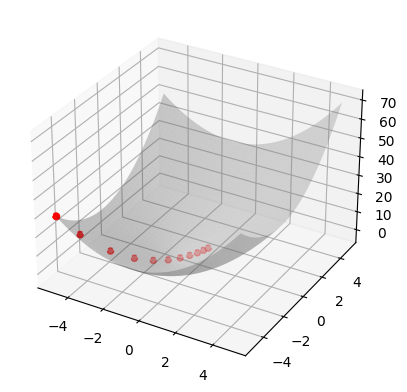

In [327]:
xs, ys, zs = GradientDescentSimple(func, fprime, x0, y0, alpha=0.1)

plotPath(xs, ys, zs, x0, y0)